# PREDICTING CUSTOMER CHURN

**Objective:** Modeling the churn probability for customers who created the account and made at least 1 purchase.

**Features:**
1.   **Target_Churn**: Churn or No churn
2.   **Target_Code**: 1(Churn) or 0(No churn)
3.   **Current_Bill_Amt**: Current bill amount that customer made.
4.   **Avg_Calls**: Number of average calls that customer made.
5.   **Avg_Calls_Weekdays**: Number of calls that customer made in weekdays.
6.   **Account_Age**: Age of the account.
7.   **Percent_Increase_MOM**: percent amount increased month over month.
8.   **Acct_Plan_Subtype**: Sub-type plan of the account.
9.   **Complaint_Code**: Complaint type.
10.  **Avg_Days_Delinquent**: Average days that customer delayed payment.
11.  **Current_TechSupComplaints**: Type of Technology Supply Complaints.
12.  **Current_Days_OpenWorkOrders**: Current_Days_OpenWorkOrders
13.  **Equipment_Age**: Age of equipment that customer used.
14.  **Condition_of_Current_Handset**: Condition_of_Current_Handset
15.  **Avg_Hours_WorkOrderOpenned**: Avg_Hours_WorkOrderOpenned






## Customer Churn Analysis

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from time import time
warnings.filterwarnings('ignore')

In [4]:
!pwd

/content


In [8]:
data= pd.read_csv(r'marketing_data/Telco_Churn_Data.csv')
data.head(5)

,Target Churn,Target Code,Current Bill Amt,Avg Calls,Avg Calls Weekdays,Account Age,Percent Increase MOM,Acct Plan Subtype,Complaint Code,Avg Days Delinquent,Current TechSupComplaints,Current Days OpenWorkOrders,Equipment Age,Condition of Current Handset,Avg Hours WorkOrderOpenned
0,No Churn,0,14210,17950.000000,30297.0000,24,-0.334193,Gold,Billing Problem,6.2,0,0.0,8,1.0,0.0
1,Churn,1,14407,0.000000,0.0000,28,0.000000,Silver,Moving,1.0,0,0.0,17,1.0,0.0
2,Churn,1,12712,204.666667,10393.6667,23,0.000000,Gold,Billing Problem,17.6,0,0.0,23,1.0,0.0
3,No Churn,0,13807,15490.333300,41256.3333,39,0.148986,Silver,Billing Problem,0.0,0,0.0,17,1.0,0.0
4,No Churn,0,3805,5075.000000,12333.3333,23,-0.686047,Gold,Billing Problem,3.8,0,0.0,10,1.0,0.0


In [9]:
len(data)
data.shape

(4708, 15)

In [13]:
#check for missing values
data.isnull().values.any()

True

In [14]:
#explore basic stats of columns in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4708 entries, 0 to 4707
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Target Churn                  4708 non-null   object 
 1   Target Code                   4708 non-null   int64  
 2   Current Bill Amt              4708 non-null   int64  
 3   Avg Calls                     4708 non-null   float64
 4   Avg Calls Weekdays            4708 non-null   float64
 5   Account Age                   4708 non-null   int64  
 6   Percent Increase MOM          4708 non-null   float64
 7   Acct Plan Subtype             4708 non-null   object 
 8   Complaint Code                4701 non-null   object 
 9   Avg Days Delinquent           4708 non-null   float64
 10  Current TechSupComplaints     4708 non-null   int64  
 11  Current Days OpenWorkOrders   4708 non-null   float64
 12  Equipment Age                 4708 non-null   int64  
 13  Con

In [15]:
#clean column names
data.columns=data.columns.str.replace(' ','_')
data.columns

Index(['Target_Churn', 'Target_Code', 'Current_Bill_Amt', 'Avg_Calls',
       'Avg_Calls_Weekdays', 'Account_Age', 'Percent_Increase_MOM',
       'Acct_Plan_Subtype', 'Complaint_Code', 'Avg_Days_Delinquent',
       'Current_TechSupComplaints', 'Current_Days_OpenWorkOrders',
       'Equipment_Age', 'Condition_of_Current_Handset',
       'Avg_Hours_WorkOrderOpenned'],
      dtype='object')

In [16]:
data.describe()

,Target_Code,Current_Bill_Amt,Avg_Calls,Avg_Calls_Weekdays,Account_Age,Percent_Increase_MOM,Avg_Days_Delinquent,Current_TechSupComplaints,Current_Days_OpenWorkOrders,Equipment_Age,Condition_of_Current_Handset,Avg_Hours_WorkOrderOpenned
count,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4264.000000,4708.000000
mean,0.485769,19828.815845,9269.690314,38127.994973,26.079652,-0.005127,13.968564,0.414826,2.438828,10.811810,1.019231,0.936501
std,0.499851,17204.510108,10437.339850,39172.244943,7.149933,4.481852,10.789062,0.954549,20.197292,8.710548,0.144021,8.926752
min,0.000000,-690.000000,0.000000,0.000000,15.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,12288.000000,2602.250002,13031.250025,20.000000,-0.574084,6.000000,0.000000,0.000000,4.000000,1.000000,0.000000
50%,0.000000,15254.000000,6396.333330,26765.833350,25.000000,-0.185280,12.400000,0.000000,0.000000,9.000000,1.000000,0.000000
75%,1.000000,22799.000000,12250.499975,50061.416675,32.000000,0.121823,19.300000,0.000000,0.000000,17.000000,1.000000,0.000000
max,1.000000,325127.000000,181786.000000,374457.667000,40.000000,210.100000,126.000000,11.000000,368.000000,39.000000,3.000000,297.500000


In [17]:
#Check the descriptive statistics of Categorical variable
data.describe(include='object')

,Target_Churn,Acct_Plan_Subtype,Complaint_Code
count,4708,4708,4701
unique,2,2,6
top,No Churn,Silver,Billing Problem
freq,2421,3914,2908


In [18]:
#Change the data type of Target_Code, 
#Condition_of_Current_Handset, and Current_TechSupComplaints columns from continuous to categorical object type:
data['Target_Code']=data.Target_Code.astype('object')
data['Condition_of_Current_Handset']=data.Condition_of_Current_Handset.astype('object')
data['Current_TechSupComplaints']=data.Current_TechSupComplaints.astype('object')
data['Target_Code']=data.Target_Code.astype('int64')
data.describe(include='object')

,Target_Churn,Acct_Plan_Subtype,Complaint_Code,Current_TechSupComplaints,Condition_of_Current_Handset
count,4708,4708,4701,4708,4264.0
unique,2,2,6,11,3.0
top,No Churn,Silver,Billing Problem,0,1.0
freq,2421,3914,2908,3589,4186.0


In [19]:
#Check the percentage of missing values for each individual column
round(data.isnull().sum()/len(data)*100,2)

Target_Churn                    0.00
Target_Code                     0.00
Current_Bill_Amt                0.00
Avg_Calls                       0.00
Avg_Calls_Weekdays              0.00
Account_Age                     0.00
Percent_Increase_MOM            0.00
Acct_Plan_Subtype               0.00
Complaint_Code                  0.15
Avg_Days_Delinquent             0.00
Current_TechSupComplaints       0.00
Current_Days_OpenWorkOrders     0.00
Equipment_Age                   0.00
Condition_of_Current_Handset    9.43
Avg_Hours_WorkOrderOpenned      0.00
dtype: float64

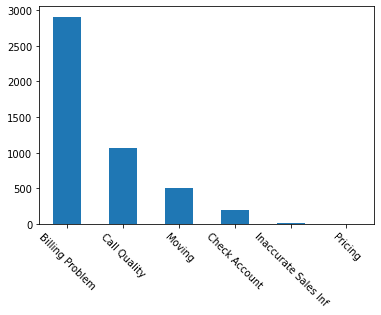

In [20]:
data.Complaint_Code.value_counts().plot(kind='bar', rot=-45)

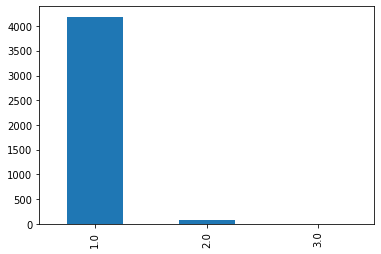

In [21]:
data.Condition_of_Current_Handset.value_counts().plot(kind='bar')

In [22]:
data['Complaint_Code']=data['Complaint_Code'].fillna(value='Billing Problem')
data['Condition_of_Current_Handset']=data['Condition_of_Current_Handset'].fillna(value=1)
data['Condition_of_Current_Handset']=data.Condition_of_Current_Handset.astype('object')

In [23]:
# explore Target_Churn
data['Target_Churn'].value_counts(0)
data['Target_Churn'].value_counts(1)*100
summary_churn = data.groupby('Target_Churn')
summary_churn.mean()

,Target_Code,Current_Bill_Amt,Avg_Calls,Avg_Calls_Weekdays,Account_Age,Percent_Increase_MOM,Avg_Days_Delinquent,Current_Days_OpenWorkOrders,Equipment_Age,Avg_Hours_WorkOrderOpenned
Target_Churn,,,,,,,,,,
Churn,1.0,20182.709226,9348.878298,37524.030899,25.418452,-0.281309,19.075339,2.498907,11.191517,0.960482
No Churn,0.0,19494.510120,9194.885309,38698.530221,26.704254,0.255769,9.144444,2.382074,10.453119,0.913846


,Target_Code,Current_Bill_Amt,Avg_Calls,Avg_Calls_Weekdays,Account_Age,Percent_Increase_MOM,Avg_Days_Delinquent,Current_Days_OpenWorkOrders,Equipment_Age,Avg_Hours_WorkOrderOpenned
Target_Code,1.000000,0.019995,0.007375,-0.014987,-0.089890,-0.059899,0.460092,0.002891,0.042373,0.002611
Current_Bill_Amt,0.019995,1.000000,0.352535,0.428040,0.003292,-0.015588,0.024285,0.076418,-0.040732,0.016852
Avg_Calls,0.007375,0.352535,1.000000,0.727226,-0.023758,-0.040899,0.019407,0.078428,-0.099348,0.013441
Avg_Calls_Weekdays,-0.014987,0.428040,0.727226,1.000000,0.029957,-0.044496,0.017134,0.065318,-0.103769,0.013577
Account_Age,-0.089890,0.003292,-0.023758,0.029957,1.000000,-0.004022,-0.047542,-0.026270,0.073503,0.005059
Percent_Increase_MOM,-0.059899,-0.015588,-0.040899,-0.044496,-0.004022,1.000000,0.049768,-0.003013,-0.003819,-0.008848
Avg_Days_Delinquent,0.460092,0.024285,0.019407,0.017134,-0.047542,0.049768,1.000000,-0.001686,0.014047,0.000168
Current_Days_OpenWorkOrders,0.002891,0.076418,0.078428,0.065318,-0.026270,-0.003013,-0.001686,1.000000,-0.037599,0.029384
Equipment_Age,0.042373,-0.040732,-0.099348,-0.103769,0.073503,-0.003819,0.014047,-0.037599,1.000000,-0.014347
Avg_Hours_WorkOrderOpenned,0.002611,0.016852,0.013441,0.013577,0.005059,-0.008848,0.000168,0.029384,-0.014347,1.000000


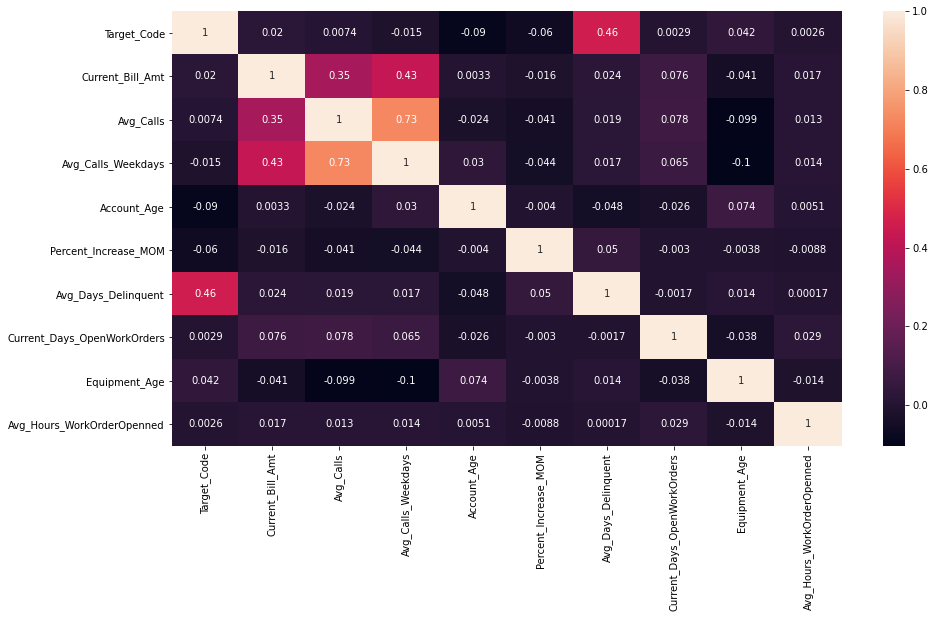

In [24]:
corr = data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True)
corr

From the plots, we see that Avg_Calls_Weekdays and Avg_Calls are highly correlated, which makes sense since they represent the same thing—average calls. Current_Bill_Amt seems to be correlated with both variables, which is as expected, since the more you talk the higher your bill will be.

### Univariate analysis



Text(0, 0.5, 'No of Customers')

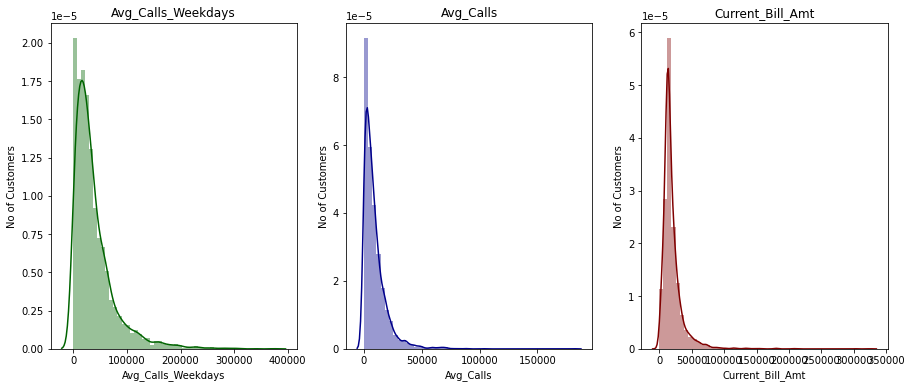

In [25]:
f, axes = plt.subplots(ncols=3, figsize=(15, 6))
sns.distplot(data.Avg_Calls_Weekdays, kde=True,  color="darkgreen", ax=axes[0]).set_title('Avg_Calls_Weekdays')
axes[0].set_ylabel('No of Customers')
sns.distplot(data.Avg_Calls, kde=True,color="darkblue", ax=axes[1]).set_title('Avg_Calls')
axes[1].set_ylabel('No of Customers')
sns.distplot(data.Current_Bill_Amt, kde=True, color="maroon", ax=axes[2]).set_title('Current_Bill_Amt')
axes[2].set_ylabel('No of Customers')

 ### Bivariate analysis

Text(0.5, 1.0, 'Customer Complaint Code Distribution')

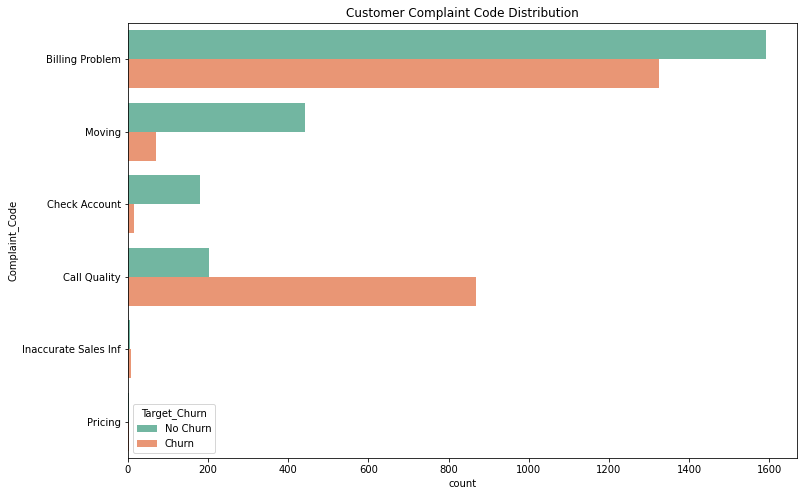

In [26]:
# plot of Complaint_Code versus Target_Churn
plt.figure(figsize=(12,8))
p=sns.countplot(y="Complaint_Code", hue='Target_Churn', data=data,palette="Set2")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Complaint Code Distribution')

As observed, Call_Quality and Billing Problem become reasons affecting customers to churn.

Text(0.5, 1.0, 'Customer Current_TechSupComplaints Distribution')

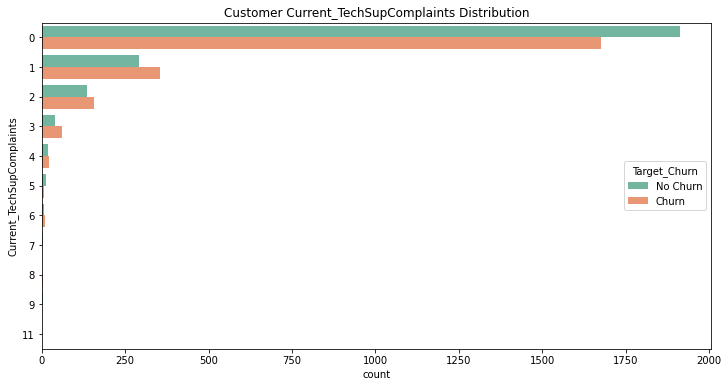

In [27]:
# plot of Current_TechSupComplaints versus Target_Churn 
plt.figure(figsize=(12,6))
p=sns.countplot(y="Current_TechSupComplaints", hue='Target_Churn', data=data,palette="Set2")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Current_TechSupComplaints Distribution')

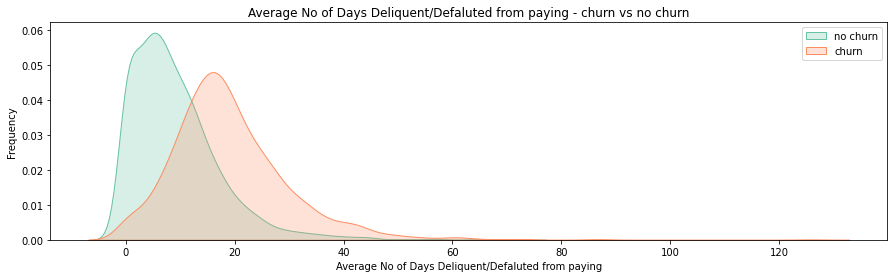

In [28]:
# plot of Avg_Days_Delinquent versus Target_Code
plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 0),'Avg_Days_Delinquent'] , color=sns.color_palette("Set2")[0],shade=True,label='no churn')
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 1),'Avg_Days_Delinquent'] , color=sns.color_palette("Set2")[1],shade=True,label='churn')
ax.set(xlabel='Average No of Days Deliquent/Defaluted from paying', ylabel='Frequency')
plt.title('Average No of Days Deliquent/Defaluted from paying - churn vs no churn')
plt.legend()

`As observed, if the average number of days delinquent is more than 16 days, customers start to churn.`

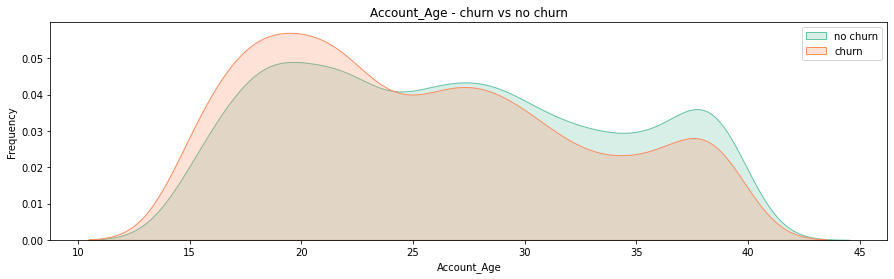

In [29]:
# plot of Account_Age versus Target_Code
plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 0),'Account_Age'] , color=sns.color_palette("Set2")[0],shade=True,label='no churn')
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 1),'Account_Age'] , color=sns.color_palette("Set2")[1],shade=True, label='churn')
ax.set(xlabel='Account_Age', ylabel='Frequency')
plt.title('Account_Age - churn vs no churn')
plt.legend()

`During the initial 15-20 days of opening an account, the amount of customer churn increases; however, after 20 days, the churn rate declines`


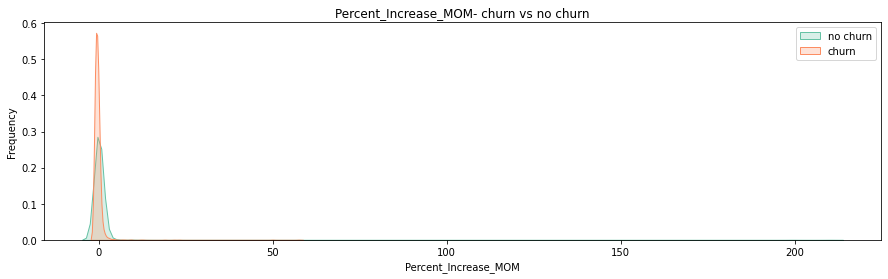

In [30]:
# plot of Percent_Increase_MOM vs Target_Code
plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 0),'Percent_Increase_MOM'] , color=sns.color_palette("Set2")[0],shade=True,label='no churn')
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 1),'Percent_Increase_MOM'] , color=sns.color_palette("Set2")[1],shade=True, label='churn')
ax.set(xlabel='Percent_Increase_MOM', ylabel='Frequency')
plt.title('Percent_Increase_MOM- churn vs no churn')
plt.legend()

## Modeling and Interpreting data

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

In [32]:
# Encode the columns
data["Acct_Plan_Subtype"] = data["Acct_Plan_Subtype"].astype('category').cat.codes
data["Complaint_Code"] = data["Complaint_Code"].astype('category').cat.codes
data[["Acct_Plan_Subtype","Complaint_Code"]].head()

,Acct_Plan_Subtype,Complaint_Code
0,0,0
1,1,4
2,0,0
3,1,0
4,0,0


In [33]:
# Split the data into a training and testing set:
target = 'Target_Code'
X = data.drop(['Target_Code','Target_Churn'], axis=1)
y=data[target]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

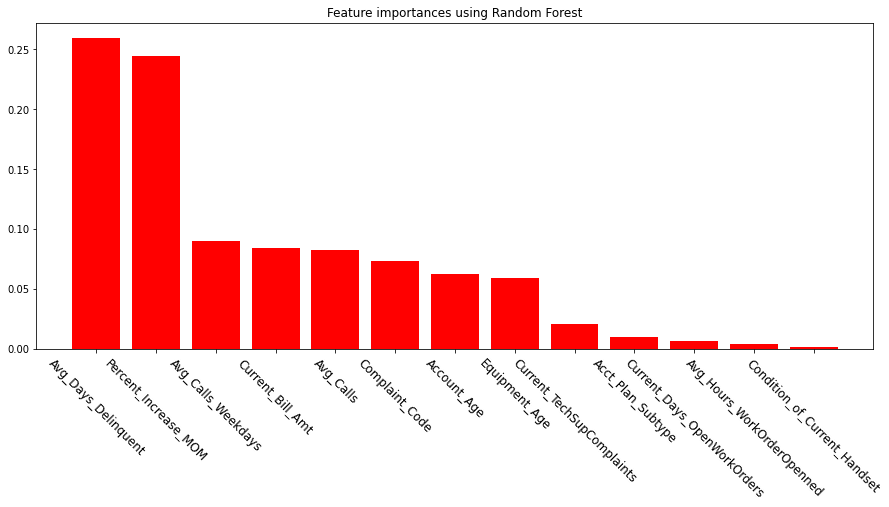

In [34]:
#Perform feature selection using the random forest classifier:
forest=RandomForestClassifier(n_estimators=500,random_state=1)
forest.fit(X_train,y_train)
importances=forest.feature_importances_
features = data.drop(['Target_Code','Target_Churn'],axis=1).columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(15,6))
plt.title("Feature importances using Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r",  align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation=-45,fontsize=12)
plt.xlim([-1, X_train.shape[1]])
plt.show()


`Avg_Day_Delinquent and Percent_Increase_MOM are prominent features for modeling churn customers sinces they showed the most relationship rate to churn customers`



In [36]:
#fit Logistic Regression model with the top 7 features
import statsmodels.api as sm
top7_features = ['Avg_Days_Delinquent','Percent_Increase_MOM','Avg_Calls_Weekdays','Current_Bill_Amt','Avg_Calls','Complaint_Code','Account_Age']
logReg = sm.Logit(y_train, X_train[top7_features])
logistic_regression = logReg.fit()

Optimization terminated successfully.
         Current function value: 0.551146
         Iterations 8


In [43]:
#get logistic regression summary
print(logistic_regression.summary())

                           Logit Regression Results                           
Dep. Variable:            Target_Code   No. Observations:                 4001
Model:                          Logit   Df Residuals:                     3994
Method:                           MLE   Df Model:                            6
Date:                Tue, 22 Dec 2020   Pseudo R-squ.:                  0.2044
Time:                        21:31:07   Log-Likelihood:                -2205.1
converged:                       True   LL-Null:                       -2771.7
Covariance Type:            nonrobust   LLR p-value:                1.433e-241
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Avg_Days_Delinquent      0.1109      0.005     24.620      0.000       0.102       0.120
Percent_Increase_MOM    -0.3922      0.049     -7.985      0.000      -0.488      -0.296
Avg_Calls_We

In [37]:
#what are the prominent parameters?
logistic_regression.params

Avg_Days_Delinquent     1.109226e-01
Percent_Increase_MOM   -3.922044e-01
Avg_Calls_Weekdays     -3.315366e-06
Current_Bill_Amt       -2.385475e-07
Avg_Calls              -1.817086e-06
Complaint_Code         -2.083688e-01
Account_Age            -4.794911e-02
dtype: float64

In [45]:
#compute cost function
coef = logistic_regression.params
def y (coef, Avg_Days_Delinquent,Percent_Increase_MOM,Avg_Calls_Weekdays,Current_Bill_Amt,Avg_Calls,Complaint_Code,Account_Age) : 
    final_coef=coef[0]*Avg_Days_Delinquent+ coef[1]*Percent_Increase_MOM+coef[2]*Avg_Calls_Weekdays+coef[3]*Current_Bill_Amt+ coef[4]*Avg_Calls+coef[5]*Complaint_Code+coef[6]*Account_Age
    return final_coef

In [46]:
# Avg_Days_Delinquent:40, Percent_Increase_MOM:5, Avg_Calls_Weekdays:39000, Current_Bill_Amt:12000, Avg_Calls:9000, Complaint_Code:0, Account_Age:17
# calculate a data sample
y1 = y(coef, 40, 5, 39000,12000,9000,0,17)
p = np.exp(y1) / (1+np.exp(y1))
p

0.8193916658925811

# Fine-Tuning Classification Algorithms


## Implementing Different Classification Algorithms

In [47]:
#Fit Logistic Regression model
from sklearn.linear_model import LogisticRegression
clf_logistic = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train[top7_features], y_train)
clf_logistic

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
#get LR model score
clf_logistic.score(X_test[top7_features], y_test)

0.7454031117397454

In [49]:
#Fit SVM model
from sklearn import svm
clf_svm=svm.SVC(kernel='linear', C=1)
clf_svm.fit(X_train[top7_features],y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [50]:
clf_svm.score(X_test[top7_features], y_test)

0.7652050919377652

In [57]:
#Fit decision tree model and get score
from sklearn import tree
start = time()
clf_decision = tree.DecisionTreeClassifier()
clf_decision.fit(X_train[top7_features],y_train)
print("Train time eslapsed in", round(time() - start,2))
clf_decision.score(X_test[top7_features], y_test)

Train time eslapsed in 0.03


0.7637906647807637

In [60]:
#Fit random forest model and get score
from sklearn.ensemble import RandomForestClassifier
clf_random = RandomForestClassifier(n_estimators=50, max_depth=None, min_samples_split=7, random_state=0)
clf_random.fit(X_train[top7_features], y_train)
print("Train time eslapsed in", time() - start)
clf_random.score(X_test[top7_features], y_test)

Train time eslapsed in 33.676366090774536


0.8118811881188119

## Tuning and Optimizing the Model


In [61]:
from sklearn import preprocessing
## Features to transform
top5_features=['Avg_Calls_Weekdays', 'Current_Bill_Amt', 'Avg_Calls', 'Account_Age','Avg_Days_Delinquent']
## Features Left
top2_features=['Percent_Increase_MOM','Complaint_Code']

In [62]:
#standardize the five features
scaler = preprocessing.StandardScaler().fit(X_train[top5_features])
X_train_scalar=pd.DataFrame(scaler.transform(X_train[top5_features]),columns = X_train[top5_features].columns)

In [63]:
#Create a variable X_train_scalar_combined, 
#combine the standardized five features with the two features (Percent_Increase_MOM and Complaint_Code), which were not standardized.
X_train_scalar_combined=pd.concat([X_train_scalar,  X_train[top2_features].reset_index(drop=True)], axis=1, sort=False)

In [64]:
#Apply the same scalar standardization to the test data (X_test_scalar_combined).
X_test_scalar=pd.DataFrame(scaler.transform(X_test[top5_features]),columns = X_test[top5_features].columns)
X_test_scalar_combined=pd.concat([X_test_scalar,  X_test[top2_features].reset_index(drop=True)], axis=1, sort=False)

In [65]:
#Fit the random forest model
clf_random.fit(X_train_scalar_combined, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [66]:
clf_random.score(X_test_scalar_combined, y_test)

0.8132956152758133

In [67]:
#define grid search starting parameters to find best parameter combination
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
parameters = [ {'min_samples_split': [4,5,7,9,10], 'n_estimators':[10,20,30,40,50,100,150,160,200,250,300],'max_depth': [2,5,7,10]}]

In [ ]:
#Use grid search CV with stratified k-fold to find out the best parameters
clf_random_grid = GridSearchCV(RandomForestClassifier(), parameters, cv = StratifiedKFold(n_splits = 10))
clf_random_grid.fit(X_train_scalar_combined, y_train)

In [45]:
print('best score train:', clf_random_grid.best_score_)
print('best parameters train: ', clf_random_grid.best_params_)

best score train: 0.8040586034912718
best parameters train:  {'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 50}


In [46]:
clf_random_grid.score(X_test_scalar_combined, y_test)

0.826025459688826

## Comparison of the Models

In [48]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics

In [49]:
#Fit the random forest classifier with the parameters obtained from grid search.
clf_random_grid = RandomForestClassifier(n_estimators=100, 
                                         max_depth=7,
                                         min_samples_split=10, 
                                         random_state=0)
clf_random_grid.fit(X_train_scalar_combined, 
                    y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [50]:
y_pred=clf_random_grid.predict(X_test_scalar_combined)

In [51]:
#Fit the classification report.
target_names = ['No Churn', 'Churn']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    No Churn       0.85      0.80      0.82       364
       Churn       0.80      0.85      0.82       343

    accuracy                           0.82       707
   macro avg       0.82      0.82      0.82       707
weighted avg       0.82      0.82      0.82       707



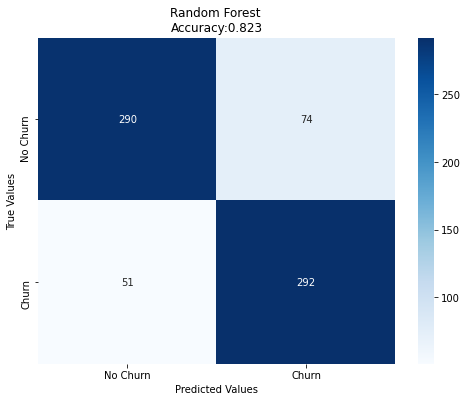

In [52]:
#Plot the confusion matrix.
cm = confusion_matrix(y_test, y_pred) 
cm_df = pd.DataFrame(cm,
                     index = ['No Churn','Churn'], 
                     columns = ['No Churn','Churn'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Blues')
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In [53]:
from sklearn.metrics import roc_curve,auc

In [55]:
#Use the classifiers which were created in our previous activity, that is, 
#clf_logistic, clf_svm, clf_decision, and clf_random_grid. 
#Create a dictionary of all these models.
models = [
{
    'label': 'Logistic Regression',
    'model': clf_logistic,
},
{
    'label': 'Decision Tree',
    'model': clf_decision,
},
{
    'label': 'Random Forest Grid Search',
    'model': clf_random_grid,
}
]

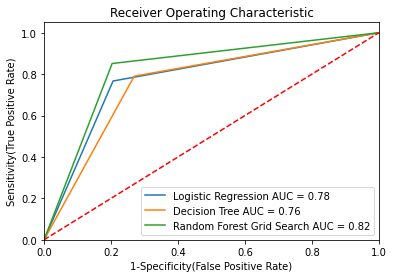

In [56]:
#Plot the ROC curve.
for m in models:
    model = m['model'] 
    model.fit(X_train_scalar_combined, y_train) 
    y_pred=model.predict(X_test_scalar_combined) 
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s AUC = %0.2f' % (m['label'], roc_auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('Sensitivity(True Positive Rate)')
plt.xlabel('1-Specificity(False Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Comparing the AUC result of different algorithms (logistic regression: 0.78, decision tree: 0.76, and random forest: 0.82), we can conclude that random forest is the best performing model with the AUC score of 0.82 and can be chosen for the marketing team to predict customer churn.